Import Required Libraries

In [ ]:
"""
Import necessary libraries for data processing, model building, and evaluation.
You need to import libraries like numpy, matplotlib, and tensorflow (Keras) or PyTorch.
"""
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

Load and Explore the Dataset

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


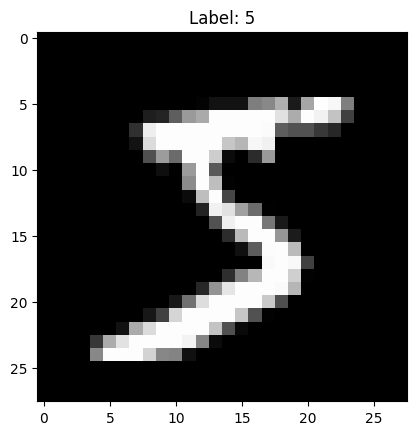

In [ ]:
"""
Load the MNIST dataset using the appropriate method.
Explore the structure of the dataset and understand how the training and test data are divided.
Display the shape of both the training and test datasets.
Display the first image in the training set along with its label.
"""
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

Data Preprocessing

In [ ]:
"""
Normalize the pixel values of the images (scale between 0 and 1).
Reshape the images to a 1D vector (28*28 = 784 features) for each image.
Convert the labels to one-hot encoding format for categorical classification.
"""
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Build the Neural Network Model

In [ ]:
"""
Define the neural network architecture.
The first layer should be a Dense layer with 128 neurons and ReLU activation.
Add a hidden layer with 64 neurons and ReLU activation.
Add an output layer with 10 neurons (one for each digit) and softmax activation.
Display the model summary to inspect the architecture.
"""
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Compile the Model

In [ ]:
"""
Compile the model by choosing an optimizer (e.g., Adam) and a loss function (e.g., categorical cross-entropy).
Specify the evaluation metric as accuracy.
"""
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train the Model

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8697 - loss: 0.4539 - val_accuracy: 0.9559 - val_loss: 0.1401
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9647 - loss: 0.1147 - val_accuracy: 0.9664 - val_loss: 0.1084
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9765 - loss: 0.0774 - val_accuracy: 0.9669 - val_loss: 0.1087
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9821 - loss: 0.0564 - val_accuracy: 0.9750 - val_loss: 0.0879
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9862 - loss: 0.0431 - val_accuracy: 0.9742 - val_loss: 0.0934
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9899 - loss: 0.0320 - val_accuracy: 0.9722 - val_loss: 0.1057
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9915 - loss: 0.0274 - val_accuracy: 0.9730 - val_loss: 0.1006
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9917 - loss: 0.0241 

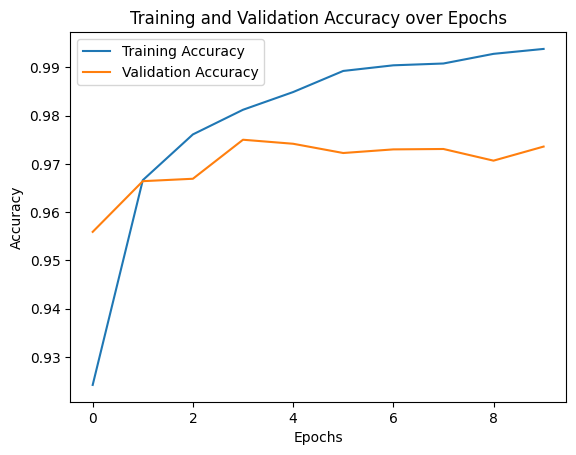

In [ ]:
"""
Train the model using the training data and validate it on a validation split (e.g., 20% of the training data).
Track the accuracy and loss metrics during training.
Plot the training and validation accuracy over epochs to visualize the learning curve.
"""
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Evaluate the Model on Test Data

In [ ]:
"""
Evaluate the trained model on the test dataset.
Report the test accuracy to see how well the model performs on unseen data.
"""
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9736 - loss: 0.1126
Test accuracy: 0.9755


Model Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


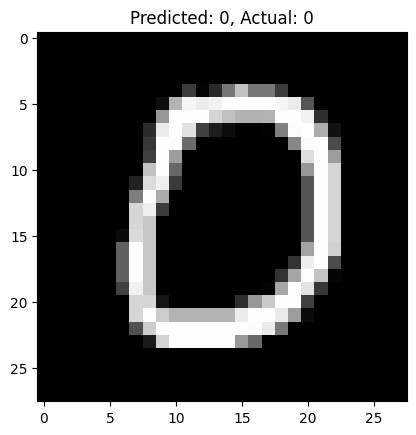

In [ ]:
"""
Use the trained model to make predictions on the test data.
Display one test image and show both the predicted and actual label.
"""
predictions = model.predict(X_test)
index = 10
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {np.argmax(y_test[index])}")
plt.show()